# Importing required modules

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import ast

%matplotlib inline

In [3]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [4]:
# Function Defintions

# Function to plot a degree distribution graph (P(k) vs k graph)
def plot_degree_dist(G):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# 1. Testing the Kevin Bacon Theory

### 1.1 Reading the TMDB 5000 Movie Credits Dataset

This dataset has been collected from [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata).

In [5]:
df = pd.read_csv('tmdb_5000_credits.csv')
df['cast'] = df.cast.apply(ast.literal_eval)
df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### 1.2 Constructing the network

In [6]:
G = nx.Graph()
added_actor = []

def add_movie_and_actors_to_graph(row):
    G.add_node(row.title, type='movie', color='blue')
    for actor in row.cast:
        if actor['name'] not in added_actor:
            G.add_node(actor['name'], type='actor', color=('red' if actor['name']=='Kevin Bacon' else 'green'))
            added_actor.append(actor['name'])
        G.add_edge(row.title, actor['name'])


_ = df.apply(lambda r: add_movie_and_actors_to_graph(r), axis=1)

In [7]:
# Print the number of nodes and edges
print(G.number_of_nodes())
print(G.number_of_edges())

# Is Actor's network connected graph
print(nx.is_connected(G))

58990
106076
False


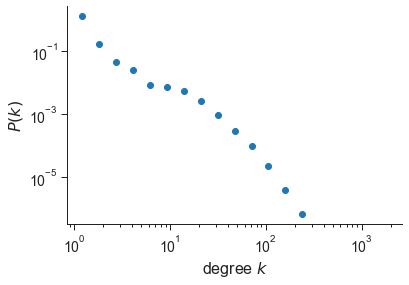

In [8]:
# Let's plot the degree distribution

plot_degree_dist(G)

### 1.3 Randomly select 5 actors

In [62]:
random_actors = random.sample(added_actor, 5)
random_actors

['Edward Finlay',
 'Levi Hayes',
 'Emma James',
 'Arie Verveen',
 'John Pawlikowski']

### 1.4 Test the theory

In [63]:
for a in random_actors:
    path = nx.shortest_path(G,source=a,target='Kevin Bacon')
    print('{0} has a Bacon score of: {1}'.format(a, int(len(path)/2)))
    print(path)

Edward Finlay has a Bacon score of: 2
['Edward Finlay', '2 Fast 2 Furious', 'James Remar', 'X-Men: First Class', 'Kevin Bacon']
Levi Hayes has a Bacon score of: 3
['Levi Hayes', 'Oliver Twist', 'Turbo', 'Ryan Reynolds', 'R.I.P.D.', 'Kevin Bacon']
Emma James has a Bacon score of: 3
['Emma James', 'Return to the Blue Lagoon', 'Milla Jovovich', 'The Fifth Element', 'Gary Oldman', 'JFK', 'Kevin Bacon']
Arie Verveen has a Bacon score of: 2
['Arie Verveen', 'The Thin Red Line', 'John C. Reilly', 'The River Wild', 'Kevin Bacon']
John Pawlikowski has a Bacon score of: 2
['John Pawlikowski', 'The Bourne Identity', 'Demetri Goritsas', 'X-Men: First Class', 'Kevin Bacon']


### 1.5 Plotting the example above

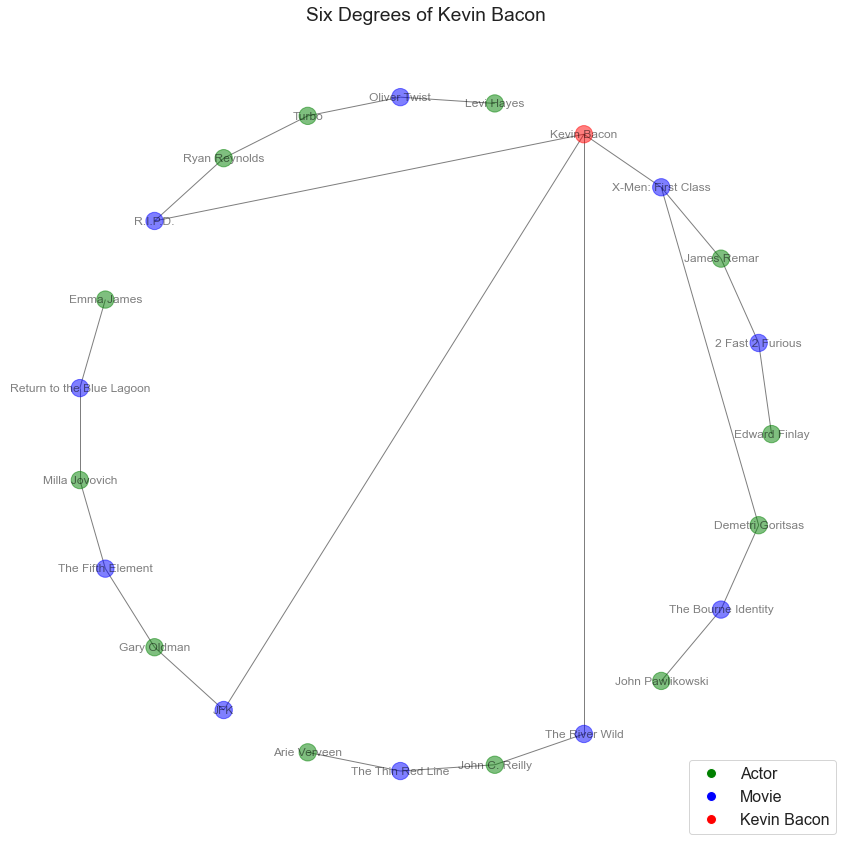

In [64]:
G_chart = nx.Graph()

for a in random_actors:
    nodes_in_path = nx.shortest_path(G, source=a, target='Kevin Bacon')
    for n in nodes_in_path:
        if not G_chart.has_node(n):
            original_node = [a for a in G.nodes(data=True) if a[0]==n][0]
            G_chart.add_node(original_node[0], type=original_node[1]['type'], color=original_node[1]['color'])  
    nx.add_path(G_chart, nodes_in_path)
    
fig, ax = plt.subplots(figsize=(15, 15))
 
# pos = nx.spring_layout(G_chart, scale=0.25)
pos = nx.circular_layout(G_chart, scale=0.25)
 
color_map = [n[1]['color'] for n in G_chart.nodes(data=True)]
labels = {n:n for n in G_chart.nodes()}
 
plt.title('Six Degrees of Kevin Bacon')
ax.axis('off')
nx.draw_networkx(G_chart, pos, node_color=color_map, alpha=0.5, labels=labels, with_labels=True, ax=ax)
 
from matplotlib.lines import Line2D
custom_legend = [Line2D([0], [0], marker='o', markerfacecolor='g', markersize=10, color='w', label='Actor'), 
                 Line2D([0], [0], marker='o', markerfacecolor='b', markersize=10, color='w', label='Movie'),
                 Line2D([0], [0], marker='o', markerfacecolor='r', markersize=10, color='w', label='Kevin Bacon')]
ax.legend(handles=custom_legend, loc='lower right')
plt.show()

# 2. How does the Actor’s Network compare to Random Networks?

Hint: Since the graph here is not connected you can find the connected components and use the largest component to find the following properties:

* Degree Distribution
* Average Path Length
* Clustering Coefficient

Note: An obvious question would be why only analyzing the largest component is relevant. We'll go into more details on this in the next class on *Scale-Free Networks*

In [65]:
def get_largest_subgraph(G):
    components = nx.connected_components(G)
    components = sorted(components, key=len, reverse=True)
    for c in components:
        G_sub = nx.subgraph(G, c)
        if nx.is_connected(G_sub) == True:
            return G_sub
    return nx.subgraph(G, components[0])

In [66]:
G_con = get_largest_subgraph(G)

print("Number of nodes ", G_con.number_of_nodes())
print("Number of edges", G_con.number_of_edges())

Number of nodes  58188
Number of edges 105402


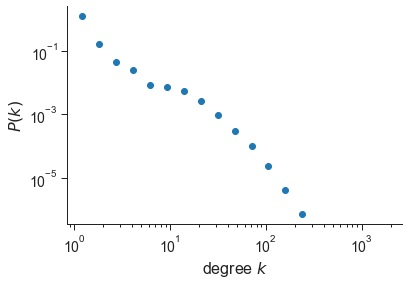

In [67]:
plot_degree_dist(G_con)

In [ ]:
# ...and calculate the clustering coefficient and average path length

C = np.mean(list(nx.clustering(G_con).values()))
d = nx.average_shortest_path_length(G_con, weight=None)

print("Average Clustering Coefficient: ", C)
print("Average Shortest Path: ", d)